In [14]:
from sklearn import linear_model #https://scikit-learn.org/stable/user_guide.html
from sklearn import tree
from sklearn import ensemble

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance

# common visualization module
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

# numeric library
import numpy as np

import os
import pandas as pd
from time import time as timer
import tarfile

import tensorflow as tf


In [15]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [16]:
import zipfile


with zipfile.ZipFile('/gdrive/MyDrive/CAS/M3/bank-additional.zip','r') as source:
    source.extractall('/gdrive/MyDrive/CAS/M3')

In [47]:
df = pd.read_csv ('/gdrive/MyDrive/CAS/M3/bank-additional/bank-additional-full.csv', sep= ';', na_values =('NaN', ''), keep_default_na = False)
df.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
pip install dtreeviz

In [44]:
from dtreeviz.trees import dtreeviz # remember to load the package

In [48]:
useful_fields = ['job',
                  'marital', 'education', 'default',
                  'housing', 'loan', 'contact', 'campaign',
                  'pdays', 'previous', 'poutcome',
                  'emp.var.rate', 'cons.price.idx','cons.conf.idx',
                  'euribor3m', 'nr.employed',
                  ]
target_field = {'y'}

#df.dropna(axis=0, subset=useful_fields+[target_field], inplace=True)

cleanup_nums = {  'job':         { 'admin.':0,'blue-collar':1,'entrepreneur':2,'housemaid':3,'management':4,'retired':5,'self-employed':6,'services':7,
                                  'student':8,'technician':9,'unemployed':10,'unknown':11},
                  'marital':     { 'divorced':0,'married':1,'single':2,'unknown':3},
                  'education':   {'basic.4y':0,'basic.6y':1,'basic.9y':2,'high.school':3,'illiterate':4,'professional.course':5,'university.degree':6,'unknown':7},
                  'default':     { 'no':0,'yes':1,'unknown':2},
                  'housing':     { 'no':0,'yes':1,'unknown':2},
                  'loan':        { 'no':0,'yes':1,'unknown':2},
                  'contact':     { 'cellular':1,'telephone':2},
                  'poutcome':    { 'failure':0,'nonexistent':1,'success':2},
                }
cleanup_y = {'y': {'yes':1, 'no':0}}


In [49]:
df_X = df[useful_fields].copy()                              
df_X.replace(cleanup_nums, inplace=True)  # convert continous categorial variables to numerical
df_Y = df[target_field].copy()
df_Y.replace (cleanup_y, inplace= True)   #convert continous categorial Y to numerical

x = df_X.to_numpy().astype(np.float32)

y = df_Y.to_numpy().astype(np.float32)

In [50]:
print(x.shape, y.shape)
df.head()

(41188, 16) (41188, 1)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [52]:
df.describe ()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [55]:
#Split in Test and Train Set
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2)

#macht lineare Regression überhaupt Sinn, wenn y nur 0 oder 1 ist?
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

#Calculate meanstandarddeviation for train and test
print('train mse =', np.std(y_train - reg.predict(x_train)))
print('test mse =', np.std(y_test - reg.predict(x_test)))

train mse = 0.2841124
test mse = 0.28142527


In [56]:
# R2
print('train R2 =', reg.score(x_train, y_train))
print('test R2 =', reg.score(x_test, y_test))

train R2 = 0.19093480000390717
test R2 = 0.21355895147035864


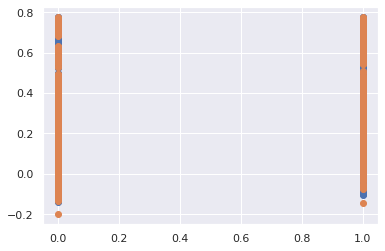

In [57]:
# 4. plot y vs predicted y for test and train parts
plt.scatter(y_train, reg.predict(x_train))
plt.scatter(y_test, reg.predict(x_test))
